In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt = 0
for dirname, _, filenames in os.walk('/kaggle/input/speechdataset'):
    for filename in filenames:
        cnt+=1
print("Total number of files "+str(cnt))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Total number of files 64814


In [2]:
!pip install noisereduce

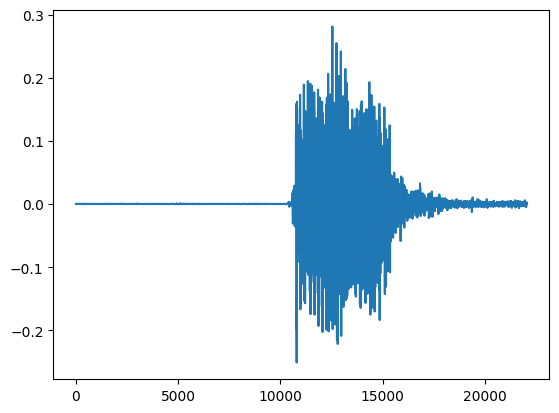

In [3]:
# Analyzing just a single audio
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import noisereduce as nr
fpath1 = '/kaggle/input/speechdataset/SpeechCommand-20231108T141130Z-001/SpeechCommand/bed/0135f3f2_nohash_0.wav'
arr1,sr1 = librosa.load(fpath1)
plt.plot(arr1)

In [4]:
ipd.Audio(arr1,rate=sr1)

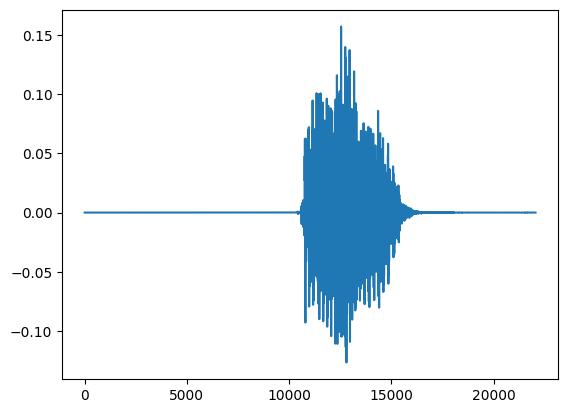

In [5]:
# Noise reduction for it
arr1_wn = nr.reduce_noise(y=arr1, sr=sr1,stationary=True)
plt.plot(arr1_wn)

In [6]:
ipd.Audio(arr1_wn,rate=sr1)

In [7]:
fold_path = '/kaggle/input/speechdataset/SpeechCommand-20231108T141130Z-001/SpeechCommand'
for x in os.listdir(fold_path):
    print(x)
dict1 = {"right": 0, "eight": 1, "cat": 2, "tree": 3, "bed": 4, "happy": 5, "go": 6, "dog": 7, "no": 8, "wow":
9, "nine": 10, "left": 11, "stop": 12, "three": 13, "sheila": 14, "one": 15, "bird": 16, "zero": 17, "seven": 18, "up": 19,
"marvin": 20, "two": 21, "house": 22, "down": 23, "six": 24, "yes": 25, "on": 26, "five": 27, "off": 28, "four": 29}
print(dict1)

no
two
four
five
nine
right
_background_noise_
off
yes
six
dog
left
bird
wow
zero
eight
bed
go
house
tree
seven
on
three
one
down
stop
up
happy
marvin
cat
sheila
{'right': 0, 'eight': 1, 'cat': 2, 'tree': 3, 'bed': 4, 'happy': 5, 'go': 6, 'dog': 7, 'no': 8, 'wow': 9, 'nine': 10, 'left': 11, 'stop': 12, 'three': 13, 'sheila': 14, 'one': 15, 'bird': 16, 'zero': 17, 'seven': 18, 'up': 19, 'marvin': 20, 'two': 21, 'house': 22, 'down': 23, 'six': 24, 'yes': 25, 'on': 26, 'five': 27, 'off': 28, 'four': 29}


In [8]:
# # Data Pre Processing
# data_arr = []
bg_arr = []
f2_path = '/kaggle/input/speechdataset/SpeechCommand-20231108T141130Z-001/SpeechCommand'
# for x in dict1.keys():
#     fp = f2_path+"/" + x
#     l1 = []
#     for j in os.listdir(fp):
#         fp1 = fp + "/" + j;
#         wv,sr2 = librosa.load(fp1);
#         l1.append(wv)
#     data_arr[x] = l1

In [9]:
f3_path = f2_path + "/_background_noise_"
for x in os.listdir(f3_path):
    fp2 = f3_path + "/" + x
    if (x == "README.md"):
        continue
    wv,sr2 = librosa.load(fp2)
    bg_arr.append(wv)

In [10]:
l9 = np.array([1,2,3,4])
l10 = np.array([5,6,7,8])
l11 = l9+l10
print(l11)

[ 6  8 10 12]


In [11]:
# Resampling check to see if same or not
from scipy import signal
fr = f2_path + "/bed" + "/012c8314_nohash_0.wav"
nsr = 16000 # Original is 22000
wv3,sr2 = librosa.load(fr)
resampwv = signal.resample(wv3,int(nsr/sr2*wv3.shape[0]))

In [12]:
ipd.Audio(wv3,rate=sr2)

In [13]:
ipd.Audio(resampwv,rate=nsr) # Hence no change even after resampling to 16000

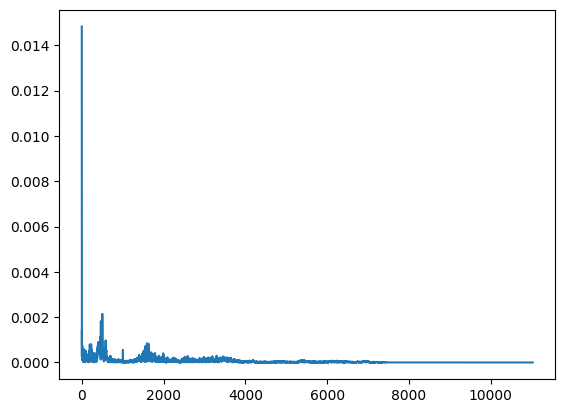

In [14]:
# Checking the ffts of both resampled and original
from scipy.fftpack import fft
t = 1/sr2
n1 = wv3.shape[0]
ny = fft(wv3)
xa = np.linspace(0.0,1.0/(2.0*t),n1//2)
ya = 2.0/n1*np.abs(ny[0:n1//2])
plt.plot(xa,ya)
plt.show()

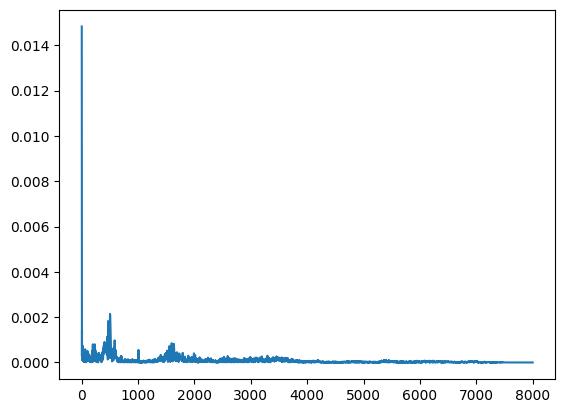

In [15]:
t = 1/nsr
n1 = resampwv.shape[0]
ny = fft(resampwv)
xa = np.linspace(0.0,1.0/(2.0*t),n1//2)
ya = 2.0/n1*np.abs(ny[0:n1//2])
plt.plot(xa,ya)
plt.show()

In [16]:
from scipy.io import wavfile
def givefeat(wv,sr3,ws=20,ss=10,ef=1e-10):
    s1 = int(round(ws*sr3/1e3))
    s2 = int(round(ss*sr3/1e3))
    fr, ts, wv4 = signal.spectrogram(np.array(wv),fs=sr3,window='hamming',nperseg=s1,noverlap=s2,detrend=False)
    return fr,ts,np.log(wv4.T.astype(np.float32)+ef)
# data4_mod_arr = []
# y1_arr = []
# for x in dict1.keys():
#     fp = f2_path+ "/" + x
#     for j in os.listdir(fp):
#         fp1 = fp + "/" + j
#         sr2,wv = wavfile.read(fp1)
#         if (len(wv)<16000):
#             wv = np.pad(wv, pad_width=(16000-len(wv),0),mode='constant',constant_values=(0, 0))
#         if (len(wv)>16000):
#             wv = [wv[np.random.randint(0, len(wv)-16000): np.random.randint(0, len(wv))] for x in range(20)]
#         fr,ts,fq1 = givefeat(wv,16000)
#         data4_mod_arr.append(fq1)
#         y1_arr.append(dict1[x])

In [17]:
for x in bg_arr:
    print(len(x))

1350648
1323000
1348479
1323000
2098788
1362816


In [18]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=a151c40aa4940401c4325672fe47b772b04d4db0a5664bcce5d0b32cff6a0bf9
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [19]:
from sklearn import preprocessing
fr = f2_path + "/bed" + "/012c8314_nohash_0.wav"
we,srp = librosa.load(fr,sr=None)
x1 = librosa.feature.mfcc(y=we,sr=srp,n_mfcc=13)
x9 = x1.flatten()
x2 = librosa.feature.delta(x1)
xc = librosa.feature.delta(x2)
xt = x2.flatten()
print(len(xt))
x3 = librosa.feature.spectral_centroid(y=we,sr=srp)
xt1 = x3.flatten()
x4 = librosa.feature.rms(y=we)
xt2 = x4.flatten()
x5 = librosa.feature.zero_crossing_rate(we)
xt3 = x5.flatten()
b1 = np.hstack([x1,x2,xc])
print(b1.shape)
print(len(xt))
print(len(x9))
print(len(xt1))
print(len(xt2))
print(len(xt3))
bg_arr = np.array(bg_arr,dtype=object)

416
(13, 96)
416
416
32
32
32


In [20]:
# data Augmentation
def noise(wv):
    p = len(wv)
    ip = np.random.choice(bg_arr)
    st = np.random.randint(0,len(ip)-p)
    wvtemp = ip[st:st+p]
    k1 = np.random.uniform(0,1)
    wvr = wv + k1*wvtemp
    return wvr
# stretching
def stretch(wv, rate=0.6):
    return librosa.effects.time_stretch(y=wv,rate=0.8)
# shifting
def shift(wv):
    srange = int(np.random.uniform(low=-10, high =10)*1000)
    return np.roll(wv, srange)

In [21]:
# trying data augmentation for smaller clips
fr = f2_path + "/bed" + "/012c8314_nohash_0.wav"
we,srp = librosa.load(fr,sr=16000)
x1 = librosa.feature.mfcc(y=we,sr=16000,n_mfcc=13)
x9 = x1.flatten()
x2 = shift(we)
ipd.Audio(x2,rate=16000)
x3 = stretch(we)
ipd.Audio(x3,rate=16000)

In [22]:
# Feature extraction using mean
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
dict5_gmm = {}
y2_arr = []
overall_features = []
cnt = 0
for x in dict1.keys():
    fp = f2_path+ "/" + x
    datarf_arr = []
    for j in os.listdir(fp):
        fp1 = fp + "/" + j
        wv1,sr2 = librosa.load(fp1,sr=None)
        mfcc1 = librosa.feature.mfcc(y=wv1, sr=sr2, n_mfcc=13)
        delta1 = librosa.feature.delta(mfcc1)
        mfcc1_flat = mfcc1.flatten()
        delta1_flat = delta1.flatten()
        if (len(mfcc1_flat)!=416):
            pn = 416 - len(mfcc1_flat)
            padd = (max(0, pn // 2), max(0, pn - pn // 2))
            mfcc1_flat = np.pad(mfcc1_flat, padd, mode='constant', constant_values=0)
        if (len(mfcc1_flat)!=416):
            pn = 416 - len(mfcc1_flat)
            padd = (max(0, pn // 2), max(0, pn - pn // 2))
            mfcc1_flat = np.pad(mfcc1_flat, padd, mode='constant', constant_values=0)
        datarf_arr.append(mfcc1_flat)
        wvt = noise(wv1)
        mfcc2 = librosa.feature.mfcc(y=wvt, sr=sr2, n_mfcc=13)
        mfcc2_flat = mfcc2.flatten()
        if (len(mfcc2_flat)!=416):
            pn = 416 - len(mfcc2_flat)
            padd = (max(0, pn // 2), max(0, pn - pn // 2))
            mfcc2_flat = np.pad(mfcc2_flat, padd, mode='constant', constant_values=0)
        datarf_arr.append(mfcc2_flat)
        if (cnt%1000==0):
            print(cnt)
        cnt+=1
    dst1 = np.array(datarf_arr)
    gmm1 = GaussianMixture(n_components=1,covariance_type='full',max_iter=500)
    gmm1.fit(dst1)
    dict5_gmm[x] = gmm1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000


In [23]:
print(dst1.shape)

(4238, 416)


In [24]:
pd1 = pd.read_csv('/kaggle/input/gaussian-mixture-models/test.csv')

In [25]:
pd1.head(10)

,ID,AUDIO_FILE
0,0,A_66293f2b358d_nohash_0.wav
1,1,A_3534412c675c_nohash_0.wav
2,2,A_912e1469561_nohash_2.wav
3,3,A_301428497c5b_nohash_0.wav
4,4,A_32884620dc14_nohash_0.wav
5,5,A_6812e41a903b_nohash_1.wav
6,6,A_17603f2b358d_nohash_2.wav
7,7,A_6820c40e715_nohash_0.wav
8,8,A_32430d53e045_nohash_2.wav
9,9,A_6157f297e878_nohash_1.wav


In [26]:
dict5 = {}
l1 = pd1['ID'].tolist()
l2 = pd1['AUDIO_FILE'].tolist()
for j in range(len(l2)):
    dict5[l2[j]] = l1[j]

In [27]:
indx = []
f5_path = '/kaggle/input/speechdataset/SpeechCommandTest-20231108T114713Z-001/SpeechCommandTest/'
cnt = 0
yans = []
data5_arr_mod = []
yans = []
keyli = list(dict5_gmm.keys())
for j in os.listdir(f5_path):
    l = []
    fp1 = f5_path + "/" + j
    indx.append(dict5[j])
    wv1,sr2 = librosa.load(fp1,sr=None)
    mfcc1 = librosa.feature.mfcc(y=wv1, sr=sr2, n_mfcc=13)
    mfcc1_flat = mfcc1.flatten()
    if (len(mfcc1_flat)!=416):
        pn = 416 - len(mfcc1_flat)
        padd = (max(0, pn // 2), max(0, pn - pn // 2))
        mfcc1_flat = np.pad(mfcc1_flat, padd, mode='constant', constant_values=0)
    data5_arr_mod.append(mfcc1_flat)
#     data5_arr_mod.append(mfcc1_flat)
#     stft = np.abs(librosa.stft(wv1))
#     l.extend([np.mean(x) for x in librosa.feature.mfcc(y=wv1,sr=16000,n_mfcc=40)])
#     #l.extend([np.mean(x) for x in librosa.feature.chroma_stft(S=stft,sr=16000)])
#     l.extend([np.mean(x) for x in librosa.feature.melspectrogram(y=wv1,sr=16000)])
    #l.extend([np.mean(x) for x in librosa.feature.spectral_contrast(S=stft,sr=16000)])
    #l.extend([np.mean(x) for x in librosa.feature.tonnetz(y=librosa.effects.harmonic(wv1), sr=16000)])
    if (cnt%1000==0):
        print(cnt)
    cnt+=1

0
1000
2000
3000
4000
5000
6000


In [28]:
data5_arr_mod4 = np.array(data5_arr_mod)
data5_arr_mod4.shape

(6835, 416)

In [29]:
yans = []
keyli = list(dict5_gmm.keys())
for i in keyli:
    gmmh = dict5_gmm[i]
    l1 = gmmh.score_samples(data5_arr_mod4)
    yans.append(l1)    

In [30]:
yans1 = np.array(np.argmax(yans,axis=0))

In [31]:
import pandas as pd
# r = []
# for i in range(len(yans)):
#     r.append(i)
# y = []
# for j in yans1:
#     y.append(dict1[keyli[j]])
# for x in range(len(y)):
#     if (y[x]!=yans1[x]):
#         print(y[x])
#         print(yans1[x])
# print(len(y))
# print(len(indx))
df_ans = pd.DataFrame({'ID':indx,'TARGET':yans1})
df_ans.to_csv('submission.csv',index=False)

In [32]:
# val = df_ans['TARGET'].value_counts()
# for i,j in val.items():
#     print(f"Entry: {i}, Count: {j}")

In [33]:
indx = []
audio_paths = []
audio_filenames = []
text_file_path = '/kaggle/input/testing/Test.txt'
with open(text_file_path, 'r') as file:
    for line in file:
        path = line.strip()
        audio_paths.append(path)
        filename = os.path.basename(path)
        audio_filenames.append(filename)
cnt = 0
ya = []
yz = []
data5_arr_mod = []
# Assuming text file only contains name of audio files like A.wav,B.wav like test.csv was given
for j in range(len(audio_filenames)):
    l = []
    fp1 = audio_paths[j]
    wv1,sr2 = librosa.load(fp1,sr=None)
    mfcc1 = librosa.feature.mfcc(y=wv1, sr=sr2, n_mfcc=13)
    mfcc1_flat = mfcc1.flatten()
    if (len(mfcc1_flat)!=416):
        pn = 416 - len(mfcc1_flat)
        padd = (max(0, pn // 2), max(0, pn - pn // 2))
        mfcc1_flat = np.pad(mfcc1_flat, padd, mode='constant', constant_values=0)
    data5_arr_mod.append(mfcc1_flat)
data5_arr_mod4 = np.array(data5_arr_mod)
data5_arr_mod4.shape
keyli = list(dict5_gmm.keys())
for i in keyli:
    gmmh = dict5_gmm[i]
    l1 = gmmh.score_samples(data5_arr_mod4)
    ya.append(l1) 
yz = np.array(np.argmax(ya,axis=0))
df_ans1 = pd.DataFrame({'TARGET':yz})
df_ans1.to_csv('Submission1.csv',index=False)